---
title: Neural Networks
layout: collection
permalink: /Machine-Learning/Neural-Networks
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Linear Classifier

We can understand a simple linear classifier as a weighted sum of the data points

$$
\hat{c} = \text{sign} (\mathbf{w}^T \mathbf{x})
$$

By the use of basis functions (basis expansion) we can have a more refined prediction. These basis functions themselfes can be learned in Neural networks

$$
f( \mathbf{w}^T \phi(\mathbf{x}))
$$

A neural network consists uf many such linear functions, creating a multilayer network. The neural network is made up of so called neurons. 
Each neuron calculates the product of the weights and the input data $ \mathbf{x} $., i.e. each neuron calculates $y_i = f(\mathbf{w_i} ^T \mathbf{x}$), where then $f(\cdot)$ is the so called activation function. For the output, the last hidden layer vector $ \mathbf{y}$ is again weighted by a vector to yield a single value output 

$$
\hat{c} = f(\mathbf{w_j}^T \mathbf{y})
$$

## Activation functions

The classic activation functions are often bounded such that they have a lower and upper bound. More modern activation functions are unbounded

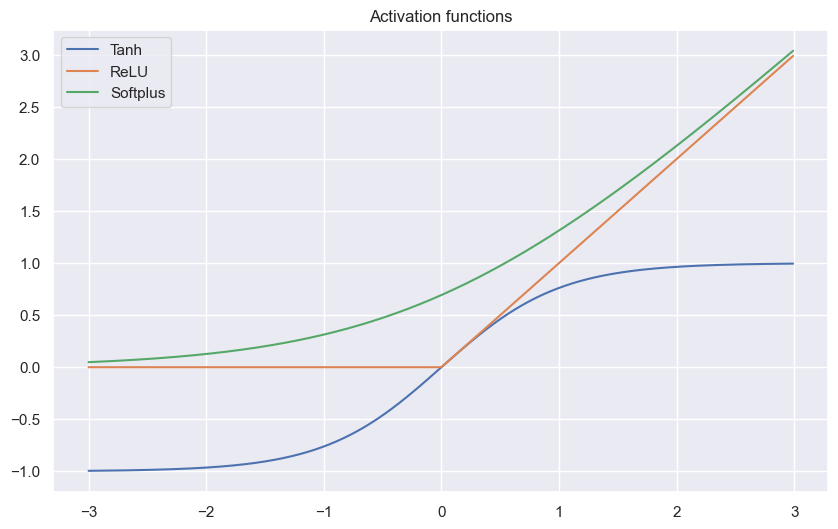

In [7]:
x = np.arange(-3, 3, 0.01)

tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
relu = [x_i if x_i > 0 else 0 for x_i in x]
softplus = np.log(1 + np.exp(x))

plt.figure(figsize=(10, 6))

plt.title('Activation functions')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.plot(x, softplus, label='Softplus')
plt.legend()
plt.show()

## Convolution

Convolution is often used for image neural networks and it works by passing a kernel (filter) of weights over an image which then calculates the sum of the pixel values.
 Our input may have multiple layers which we would like to combine, for this we use a convolutional layer, which passes different filters over the different layers of the input and combines the weighted sum of all the layers to create a single layer.

![convolution_gif](convolution.gif)

## Pooling

We can then pool the output of the convolution. 
The exist different pooling methods. We again pass a kernel (filter) over the output and iniside this grid, we can perform different functions, often used pooling methods are 

1. Average pooling: Taking the average inside the kernel
2. Max pooling: Taking the maximum value inside the kernel

Both pooling and convolution causes a reduction in the number of inputs to the next layer.

## Residual connection

The residual connections is an additional link that connects some layers in a neural network that are not directly adjacent. 
The usage of them may help with floating point errors for deep networks.
Often large and deep networks suffer from exploding gradients or vanishing gradients, the usage thus of residual connections has been shown to aid in preventing these kinds of errors.

## Dropout 

Dropout refers the the dropping out of the nodes in a neural network. At each iteration a node is dropped out with a certain probability. 
Dropout layers often help with preventing of overfitting. In overfitting, a unit may change in a way that fixes up the mistakes of the other units. This leads to complex co-adaptations, which in turn leads to the overfitting problem because this complex co-adaptation fails to generalise on the unseen dataset.

Now, if we use dropout, it prevents these units to fix up the mistake of other units, thus preventing co-adaptation, as in every iteration the presence of a unit is highly unreliable. So by randomly dropping a few units (nodes), it forces the layers to take more or less responsibility for the input by taking a probabilistic approach.

# Backpropagation

Imagine we have a NN with our input vector $ \mathbf{x}$, a hidden layer where each neuron ($w_{ji}$) gives the output $y_i$ and then an output layer ($w_
{kj}$) which gives us the output $z_i$, which we then compare to our target values $t_i$.
We use the mean squared training error $ J(\mathbf{w}) = \frac{1}{2n} \sum_{l=1}^n || \mathbf{t}_l - \mathbf{z}_l (\mathbf{w})||^2 $ for training and we would now like to adjust our parameters by using gradient descent. Because $ \mathbf{z}_l(\mathbf{w}) = \phi(net_l) = \phi (\mathbf{w}_l^T \mathbf{y})$. Here $k$ denotes the $k$-th layer (last layer here) and $j$ is the $j$-th component of the $k$-th weights.

$$
\mathbf{w} \leftarrow \mathbf{w} + \triangle \mathbf{w}, \quad \triangle \mathbf{w} = - \eta \frac{\partial J}{\partial \mathbf{w}} 
$$

For our hidden to output units we get 

$$
\frac{\partial J}{\partial w_{kj}})
= 
\frac{\partial J}{\partial z_k} \frac{\partial z_k}{\partial w_{kj}} 
=
\frac{\partial J}{\partial z_k} \frac{\partial z_k}{net_k}  \frac{\partial net_k}{\partial w_{kj}} 
= 
\frac{\partial J}{\partial z_k} \frac{\partial z_k}{net_k} \frac{\partial \mathbf{w}_k^T \mathbf{y}}{\partial w_{kj}} 
= 
\frac{\partial J}{\partial z_k} \frac{\partial z_k}{net_k} y_j 
=
\delta_k y_j
$$

The sensitivity $\delta_k$ describes how the overall error changes with the unit's net acvtivation.

$$
\delta_k 
= 
\frac{\partial J}{\partial z_k} \frac{\partial z_k}{net_k} 
= 
\left( \frac{\partial }{\partial z_k} \frac{1}{2}(t_k - z_k)^2 \right) \left( \frac{\partial  }{\partial net_k} \phi(net_k) \right)
= - (t_k - z_k) \phi'(net_k)
$$

Thus we get the gradient step

$$
\triangle w_{kj} = -\eta \frac{\partial J}{\partial w_{kj}} = - \eta \delta_k \delta_k y_j = \eta (t_k - z_k) \phi'(net_k) y_j
$$

For our input to hidden units we have that

$$
y_j = \phi(net_j) = \phi(\mathbf{w}^T_j \mathbf{x})
$$

thus the gradient for our hidden neurons is the same but looking now at the  $ \mathbf{w}_{ji}$ component of the $j$-th weights.

$$
\frac{\partial J}{\partial w_{ji}} 
= 
\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial w_{ji}} 
=
\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial net_j} \frac{\partial net_j}{\partial w_{ji}} 
=
\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial net_j} \frac{\partial \mathbf{w}_j^T \mathbf{x}}{\partial w_{ji}} 
=
\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial net_j} x_i
=
\delta_j x_i
$$

Because for $ \mathbf{z}_l(\mathbf{w}) = \phi(net_l) = \phi (\mathbf{w}_l^T \mathbf{y}) = \phi \left( \sum_{i=1}^d w_{li} \sum_{k=1}^c \mathbf{w}_{k} \mathbf{x} \right)$

$$
\delta_j 
= 
\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial net_j} 
= 
\left( \sum_{k=1}^c \frac{\partial J }{\partial net_k} \frac{\partial net_k }{\partial y_j} \right) \left( \frac{\partial }{\partial net_j} \phi(net_j) \right)
=
\phi'(net_j) \sum_{k=1}^c \delta_k w_{kj} 
$$

Thus the sensitivity of the hidden unit is proportional to the weighted sum of sensitivities at the ouput units. It then follows that the output sensitivities are propogated back to the hidden units. 
For our gradient step we then get

$$
\triangle w_{ji} = - \eta \frac{\partial J}{\partial w_{ji}} = -\eta \delta_j x_i = -\eta \phi'(net_j) x_i \sum_{k=1}^c \delta_k w_{kj}
$$

## Stochastic Backpropagation

In stochastic Backpropagation, we update our weights $ \mathbf{w}$ by using only a randomly subsample set of our data.

1. Choose $ \mathbf{x}^m $ at random (m-iteration
2. $w_{kj} \leftarrow w_{kj} - \eta \delta^m_k y_j^m$
3. $w_{jj} \leftarrow w_{jj} - \eta \delta^m_j x_i^m$
4. $m \leftarrow m + 1$

until $||\nabla J(\mathbf{w})|| < \epsilon $.


# Expressive Power of Networks

Looking now at the capabilities of NN, we may ask what is needed to be able to make decisions, predictions etc. 
In escence, a three layer NN is able to make every decision.
If the input-output relation is continuous and if there are sufficiently many hidden units.

1. **Superposition Theorem**

*Every continious function $f(x)$ on the hypercube $I^d (I = [0, 1], d \geq 2)$ can be represented in the form*

$$
f(x) = \sum_{j=1}^{2d + 1} \Phi \left( \sum_{i=1}^d \psi_{ji} (x_i)  \right)
$$

*for properly chosen $\Phi : \mathbb{R} \rightarrow \mathbb{R}, \psi_{ji}:[0, 1] \rightarrow \mathbb{R}$.*
Thus any multivariate function continious function can be represented as a superposition of one-dimensional functions.
For our NN this means that each of the $2d + 1$ hidden unit takes as input a sum of $d$ nonlinear functions, $\sum_{i=1}^d \psi_{ji} (x_i)$, on for each input feature $x_i$.
Each hidden unit them emits a non linear function $\Phi(\cdot)$ of its total input. 
The ouput unit then emits the sum of all contributions of the hidden units.

The problem with this theorem for our NN is that the functions $\Phi$ and $\psi_{ji}$ only exist bny the theorem, but may be hard to find maybe even impossible.

2. **Weierstrass Approximation Theorem**

*Suppose $f$ is a continuous real-valued function defined on the real interval $[a, b]$, i.e. $f \in C([a, b])$. For every $\epsilon > 0$, there exists a polynomial $p$ such that $||f - p||_{\infty, [a, b]} < \epsilon$.*

Thus any real valued continous function on a defined interval can be uniformly approximated by a polynomial function.  
Polynomial functions are thus dense in $C([a, b])$.

Using so called ridge functions $f( \mathbf{x}) : \mathbb{R}^n \rightarrow \mathbb{R}$, or $f(\mathbf{x}) = \phi(\mathbf{w}^T \mathbf{x} + b)$. 
They are differentiable at $z = \mathbf{w}^T \mathbf{x} + b$:
 
$$
\Rightarrow \nabla_{\mathbf{x}} f(\mathbf{x}) = \phi'(z) \nabla_{\mathbf{x}}(\mathbf{w}^T \mathbf{x} + b) = \phi'(z) \mathbf{w}
$$

The gradient descent is therefor simple to calculate and is just defined by the direction of the linear part. Because now the polynomials can be represented arbitrarily well by combinations of ridge functions, it follows that the ridge functions are also dense in $C([0, 1])$. By ***Dimension lifting***, density on the unit interval implies density on the hypercube. Thus the superposition of ridge functions creates a dense hypercube space.

3. **Universal approximations by ridge functions Theorem**

*Let $\phi(\cdot)$ be a non-constant, bounded, and monotonically-increasing continious function. Let $I^d$ denote the unit hypercube $[0, 1]^d$, and $C(I^d)$ the space of continuous functions on $I^d$. Then, given any $\epsilon > 0$ and any function $f \in C(I^d)$, there exist an integer $N$, real constants $b_i, b_i \in \mathbb{R}$ and real vectors $ \mathbf{w}_i \in \mathbb{R}^d, i=1, ..., N$, such that we may define*

$$
F(x) = \sum_{i=1}^N v_i \phi(\mathbf{w}_i^T \mathbf{x} + b_i)
$$

*as an approximate realization of the function $f$, i.e. $||F - f||_{\infty, I^d} < \epsilon $*.

Thus functions of the form $F(x)$ are dense in the space $C(I^d)$. This also still holds when replacing $I^d$ with any compact subset of $ \mathbb{R}^d$.